                                           # Nanodegree Udacity

# PROJETO 2: Prevendo Preço de Imóveis em Boston 

## Lucas Arneiro Vieira

#### From April 12/2019 to April 24/2019

# Explorando os Dados
Neste projeto final do nanodegree da Udacity, iremos avaliar o desempenho e o poder de estimativa de um modelo que foi treinado e testado em dados coletados dos imóveis dos subúrbios de Boston, Massachusetts. O conjunto de dados para este projeto se origina do repositório de Machine Learning da UCI. Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados: <br>

- 16 observações de dados possuem um valor 'MEDV' de 50.0. Essas observações provavelmente contêm valores ausentes ou censurados e foram removidas. <br>

- 1 observação de dados tem um valor 'RM' de 8.78. Essa observação pode ser considerada valor atípico (outlier) e foi removida. <br>

- Os atributos 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' são essenciais. O resto dos atributos irrelevantes foram excluídos. <br>

- O atributo 'MEDV' foi escalonado multiplicativamente para considerar 35 anos de inflação de mercado. <br>

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em atributos e variável alvo. O atributos, 'RM', 'LSTAT' e 'PTRATIO', nos dão informações quantitativas sobre cada ponto de dado. A variável alvo, 'MEDV', será a variável que procuramos estimar. Eles são armazenados em features e prices, respectivamente.

- 'RM' é o número médio de cômodos entre os imóveis na vizinhança. <br>
- 'LSTAT' é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado). <br>
- 'PTRATIO' é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança. <br>

In [1]:
# Importar as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Êxito
print("O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape))

print('\n-Amostra dos 5 primeiros dados: \n')
data.head()

O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.

-Amostra dos 5 primeiros dados: 



,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


# 1. Calculando Estatísticas com numPy
Calcular o mínimo, o máximo, a média, a mediana e o desvio padrão do 'MEDV', que está armazenado em prices.
Armazenar cada cálculo em sua respectiva variável.

In [2]:
# TODO: Preço mínimo dos dados
minimum_price = None
minimum_price = np.min(prices)

# TODO: Preço máximo dos dados
maximum_price = None
maximum_price = np.max(prices)

# TODO: Preço médio dos dados
mean_price = None
mean_price = np.mean(prices)

# TODO: Preço mediano dos dados
median_price = None
median_price = np.median(prices)

# TODO: Desvio padrão do preço dos dados
std_price = None
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print("Estatísticas para os dados dos imóveis de Boston:\n")
print("Preço mínimo: ${:,.2f}".format(minimum_price))
print("Preço máximo: ${:,.2f}".format(maximum_price))
print("Preço médio: ${:,.2f}".format(mean_price))
print("Preço mediano: ${:,.2f}".format(median_price))
print("Desvio padrão dos preços: ${:,.2f}".format(std_price))

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13


### Questão 1:

##### Usando a sua intuição, para cada um dos atributos: 'RM', 'LSTAT' e 'PTRATIO', você acha que um aumento no seu valor poderia levar a um aumento no valor do 'MEDV' ou uma diminuição do valor do 'MEDV'? Justifique sua opinião para cada uma das opções.

###### Resposta:

Considerando os atributos, tem-se diferentes intuições com relação ao aumento de valor do imóvel. 

- Tem-se que, quanto maior o número médio de cômodos (RM), provavelmente maior a casa, consequentemente, maior o valor do imóvel (MEDV), ou vice-versa. <br>

- Levando-se em conta que a vizinhaça é de classe-baixa, esta possui moradores com menor poder de compra, à partir disto, tem-se o valor dos imóveis (MEDV) menor aos de vizinhaças de alta e média classe. <br>

- Por último, considerando-se o fator de que, quanto maior for o número de professores, ou menor a média de alunos/professor (PTRATIO), o valor da escola é maior, interferindo no aumento do custo do imóvel na vizinhaça.


# 2. Desenvolvendo um Modelo
### 2.1 Métrica de Desempenho
Nesta etapa, vamos medir a qualidade de um modelo dado. Para este projeto, vamos calcular o coeficiente de determinação, $R^{2}$, para quantificar o desempenho do seu modelo. O coeficiente de determinação é uma estatística útil no campo de análise de regressão uma vez que descreve o quão "bom" é a capacidade do modelo em fazer estimativas. Os valores para $R^{2}$ (geralmente presente em regressão) têm um alcance de 0 a 1, que captura a porcentagem da correlação ao quadrado entre a estimativa e o valor atual da variável alvo. 

Um modelo $R^{2}$ de valor 0 sempre falha ao estimar a variável alvo, enquanto que um modelo $R^{2}$ de valor 1, estima perfeitamente a variável alvo. Qualquer valor entre 0 e 1 indica qual a porcentagem da variável alvo (ao utilizar o modelo) que pode ser explicada pelos atributos. 

Um modelo pode dar também um $R^{2}$ negativo, que indica que o modelo não é melhor do que aquele que estima ingenuamente a média da variável alvo.

Para a função ‘performance_metric’ na célula de código abaixo, vamos implementar o seguinte:

- Utilizar o r2_score do sklearn.metrics para executar um cálculo de desempenho entre y_true e y_predict. <br>
- Atribuir a pontuação do desempenho para a variável score. <br>

In [3]:
# Importar 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    # Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = None
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

### Questão 2:
Admita que um conjunto de dados que contém cinco observações de dados e um modelo fez a seguinte estimativa, exibida nos dados abaixo:

In [4]:
# Calcular o desempenho deste modelo
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score))

O coeficiente de determinação, R^2, do modelo é 0.923.


#### Você consideraria que esse modelo foi capaz de capturar a variação da variável alvo com sucesso? Por que ou por que não?

###### Resposta:
O coeficiente de 0.923, indica qual a porcentagem da variável alvo, que pode ser explicada pelos atributos. Ou seja, a variável dependente (Y) pode ser estimada, aproximadamente em 92,3% pela variavel independente (X). Considerando este valor, pode-se dizer que o modelo foi capaz de capturar a variação da variável alvo com boa variação, próximo a 1. 

### 2.2. Implementação: Misturar e Separar os Dados
Utiliza-se o conjunto de dados de imóveis de Boston e divida os dados em subconjuntos de treinamento e de teste. Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

- Utilize `train_test_split` do `sklearn.model_selection` para misturar e dividir os dados de features e prices em conjuntos de treinamento e teste. <br>
 - Divida os dados em 80% treinamento e 20% teste. <br>
 - Mude o random_state do `train_test_split` para um valor de sua escolha. Isso garante resultados consistentes. <br>
 - Atribuir a divisão de treinamento e teste para X_train, X_test, y_train e y_test`. <br>

In [5]:
# Importar 'train_test_split'

from sklearn.model_selection import train_test_split

# Misturar e separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = (None, None, None, None)

X = np.array(data[['RM', 'LSTAT', 'PTRATIO']])
y = np.array(data['MEDV']) 

# Esse comando faz: X = dados. y = classe = resposta dos dados. Entrego ao algoritmo para ele aprender
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
'''test_size = percentual dos dados que queremos como teste'''

'''
print('\n- Numero de linhas no treino, dados sem as classes')
X_train.count()

print( '\n- Respostas do treino')
y_train.head()

print('\n- Dados que ele nao conhece, que serão usados para teste')
X_test.count()

print('\n- Dados de teste')
y_test.count()
'''

# Êxito
print("Separação entre treino e teste feita com êxito.")

Separação entre treino e teste feita com êxito.


### Questão 3:

#### Qual o benefício de separar o conjunto de dados em alguma relação de subconjuntos de treinamento e de teste para um algoritmo de aprendizagem?

###### Resposta:

Pode-se dizer alguns benefícios com relação a separação do conjunto de dados, em subconjuntos de treinamento e teste para o algoritmo de aprendizagem, como:

- É necessário o treinamento de uma maior parte de dados, geralmente 75% a 80%, pois quanto maior o número de dados, melhor para verificar a eficácia do conjunto. <br>

- À partir deste treinamento, é necessário testar o modelo, oriundo da mesma base de dados, ou seja, os 25% a 20% restantes, verificando a eficácia do conjunto. Caso não haja o teste do modelo, não é possível avaliar o treinamento realizado, consequentemente, não é recomendável apenas confiar no aprendizado do algoritmo. <br>

# 3. Analisando o Modelo de Desempenho

Na terceira parte deste projeto, veremos o desempenho em aprendizagem e teste de vários modelos em diversos subconjuntos de dados de treinamento. Além disso, iremos investigar um algoritmo em particular com um parâmetro `'max_depth'` (profundidade máxima) crescente, em todo o conjunto de treinamento, para observar como a complexidade do modelo afeta o desempenho. Plotar o desempenho do seu modelo baseado em critérios diversos pode ser benéfico no processo de análise, por exemplo: para visualizar algum comportamento que pode não ter sido aparente nos resultados sozinhos.

### 3.1 Curvas de Aprendizagem

A célula de código seguinte produz quatro gráficos para um modelo de árvore de decisão com diferentes níveis de profundidade máxima. Cada gráfico visualiza a curva de aprendizagem do modelo para ambos treinamento e teste, assim que o tamanho do conjunto treinamento aumenta. Note que a região sombreada da curva de aprendizagem denota a incerteza daquela curva (medida como o desvio padrão). O modelo é pontuado em ambos os conjuntos treinamento e teste utilizando R<sup>2</sup>, o coeficiente de determinação.  

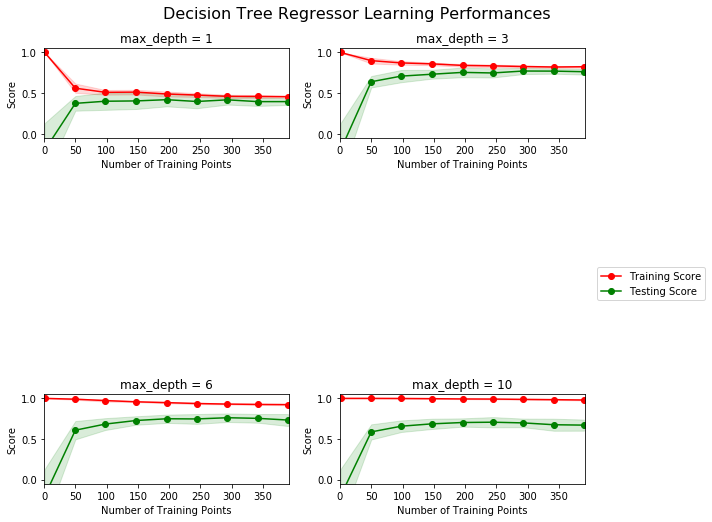

In [45]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e profundidades máximas
vs.ModelLearning(features, prices)

### Questão 4: Compreendendo os Dados

###### Resposta:

- Analisando o segundo gráfico, da esquerda para direita, com max_depth = 3. <br>

- Pode-se dizer que a medida que acrescentamos o número de pontos para o treinamento, o valor de pontuação, ou o desempenho do seu modelo, de ambas as curvas de treinamento e teste, tendem a ter um valor próximo, no caso de 75% para cerca de 200 pontos. Considerando esta situação, com uma pontuação ainda com um valor abaixo do ideal, conseguir mais dados de treinamento, não ajudará, pois o modelo já foi aprendido, atingiu seu limite. À partir disto, tende a ter um rendimento descrescente. <br>

- Quanto maior o número de pontos de treinamento, neste modelo, não estariamos beneficiando-o. O fato ocorre, pois, a medida que acrescenta-se pontos de treinamento, a pontuação "score" tende a se manter em 75%. Contudo, aumentar a complexidade do modelo, criando novos e mais relevantes recursos, provavelmente, produzirá maior impacto. <br>

### 3.2 Curvas de Complexidade

A célula de código a seguir produz um gráfico para um modelo de árvore de decisão que foi treinada e validada nos dados de treinamento utilizando profundidades máximas diferentes. O gráfico produz duas curvas de complexidade – uma para o treinamento e uma para a validação. Como a **curva de aprendizagem**, a área sombreada de ambas as curvas de complexidade denota uma incerteza nessas curvas, e o modelo pontuou em ambos os conjuntos de treinamento e validação utilizando a função `performance_metric`.

Como se sabe que um modelo está experimentando viés alto ou variância alta? Viés alto é um sinal de **underfitting** (o modelo não é complexo o suficiente para aprender os dados) e alta variância é um sinal de **overfitting** (o modelo está "decorando" os dados e não consegue generalizar bem o problema). Pense em modelos (com profundidade de 1 e 10, por exemplo) e qual deles está alinhado com qual parte do equilíbrio.

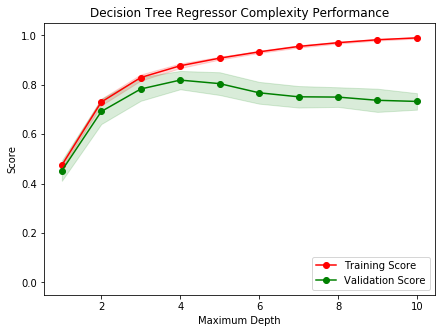

In [6]:
vs.ModelComplexity(X_train, y_train)

### Questão 5: Equilíbrio entre viés e variância

###### Resposta:

- Considerando uma profundidade máxima = 1, o modelo apresenta um viés alto, pois o modelo não é complexo o suficiente para aprender os dados. Considera-se isso, ao analisar seu score = 0,45 aproximadamente em média, para ambos os casos e para Maximum Depth = 1. <br>

- Considerando a profundidade máxima = 10, o modelo apresenta um Score próximo de 1, para curva de treinamento, e um Score de 0,75 em média, para curva de validação. Isso mostra uma tendência de alta variância, ou seja, o Score tende a se manter 1 ou 0,75, mesmo aumentando a nossa profundidade para ambos, característica de que os modelo estão "decorando" os dados (overfitting). <br>

- Pode-se reparar no gráfico, que os valores de Scores são baixos, entre 0,39 e 0,5 para uma profundidade de 1, nas curvas de Validação e Treino, respectivamente. Além disso, à partir de uma profundidade de 5, os valores de ambas as curvas tendem a ficar constantes.

### Questão 6: Modelo Ótimo de Melhor Suposição

###### Resposta:

   A profundidade máxima (`'max_depth'`) = 4 resulta em um modelo em que as cruvas de Validação e Teste tendem a apresentar uma pontuação próxima de 80% e é um ponto em que não supercomplica o modelo. As curvas mostram que à partir de uma profundidade igual a 5, ambas tendem a se "separar", a tomarem caminhos diferentes. Tem-se a Validação tendendo a um ótimo Score = 1, porém parece estar tornando o modelo de forma automática, assim como o Treinamento, que apresentará um Score menor, próximo de 75%.

# 4. Avaliando o Desempenho do Modelo
Nesta parte final do projeto, construiremos um modelo e fazer uma estimativa de acordo com o conjunto de atributos do cliente utilizando um modelo otimizado a partir de `fit_model`.

### Questão 7: Modelo Ótimo de Melhor Suposição

###### Resposta:

A técnica de busca em matriz (*grid search*), considerando a matriz nossos valores de max_depth, consiste em analisar múltiplas combinações de parâmetros e a cada combinação, é feita uma análise de performance do algoritmo escolhendo-se aquele que deu o melhor resultado (TANAKA, Marcos, 2018). Esta técnica é utilizada para determinar qual seria a melhor profundidade da árvore (max_depth), de modo a não tornar um modelo muito sensível a nuances dos dados ou muito rasa, sem compreender a complexidade do cenário a ser modelado.  

Pode-se citar como exemplo, um modelo exemplificado no blog: MINERANDO DADOS, onde queremos controlar a complexidade de um modelo, determinando qual o melhor valor de C para treinar uma regressão logística proposta. 

Pode-se encontrar o código em: http://minerandodados.com.br/index.php/2018/01/17/gridsearch-algoritmo-machine-learning/ e exemplos na [documentação](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) oficial.


### Questão 8: Validação Cruzada

###### Resposta:

Validação cruzada, ou "cross validation" nos permite verificar se um modelo de Machine Learning está se saindo de maneira ideal, evitando problemas recorrentes como o *underfitting* e *overfitting*.  O "k-fold cross validation", consiste em dividir o conjunto de dados da 'Validação' em k pedaços, ou conjuntos, menores. Para cada pedaço, estimamos o método sem a presença desta parte e verificamos o erro médio no pedaço não utilizado durante o treino (RELVAS, Carlos, 2015). Supondo que k = 5, o modelo será treinado com 4 partes, e testado com a parte restante. Esse processo é repetido até que o modelo seja treinado e testado com todas as partes do dado. A estimativa do erro de predição de cross validation é dada pela média dos erros médios nos k pedaços. Na prática, costuma-se utilizar k variando de 5 a 10, que apesar de poder ser computacionalmente cara, não desperdiça muitos dados e evita inferências inversas onde o número de amostras é pequeno.

FONTES:

- https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation <br>

- http://minerandodados.com.br/index.php/2018/02/22/cross-validation-com-python/ <br>

- http://dsdoportuga.blogspot.com/2015/06/validacao-cruzada-cross-validation.html <br>

### 4.1 Implementação: Ajustar um Modelo

Agora, vamos garantir que estamos produzindo um modelo otimizado, treinaremos o modelo utilizando busca em matriz para otimizar o parâmetro de profundidade máxima (`'max_depth'`) para uma árvore de decisão. Esse parâmetro pode ser entendido como o número de perguntas que o algoritmo de árvore de decisão pode fazer sobre os dados antes de fazer uma estimativa. Árvores de decisão são parte de uma classe de algoritmos chamados *algoritmos de aprendizagem supervisionada*.

Além disso, você verá que a implementação está usando o `ShuffleSplit()` como alternativa para a validação cruzada (veja a variável `cv_sets`). Ela não é a técnica descrita na **Questão 8**, mas ela é tão útil quanto. O `ShuffleSplit()` abaixo irá criar 10 (`n_splits`) conjuntos misturados e 20% (`test_size`) dos dados serão utilizados para validação. Enquanto estivermos trabalhando na sua implementação, pense nas diferenças e semelhanças com a validação k-fold.

** O `ShuffleSplit` tem diferentes parâmetros nas versões 0.17 e 0.18/0.19 do scikit-learn.**
* [Versão 0.17](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.ShuffleSplit.html#sklearn.cross_validation.ShuffleSplit) - `ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, indices=None, random_state=None, n_iterations=None)`
* [Versão 0.18](http://scikit-learn.org/0.18/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) - `ShuffleSplit(n_splits=10, test_size=’default’, train_size=None, random_state=None)`

Para a função `fit_model` na célula de código abaixo, vamosprecisar implementar o seguinte:
- Utilize o [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) do `sklearn.tree` para gerar um objeto regressor de árvore de decisão.
  - Atribua esse objeto à variável `'regressor'`.
- Gere um dicionário para `'max_depth'` com os valores de 1 a 10 e atribua isso para a variável `'params'`.
- Utilize o [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) do `sklearn.metrics` para gerar um objeto de função de pontuação.
  - Passe a função `performance_metric` como um parâmetro para esse objeto.
  - Atribua a função de pontuação à variável `'scoring_fnc'`.
- Utilize o [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) do `sklearn.grid_search` para gerar um objeto de busca por matriz.
  - Passe as variáveis `'regressor'`, `'params'`, `'scoring_fnc'` and `'cv_sets'` como parâmetros para o objeto. 
  - Atribua o objeto `GridSearchCV` para a variável `'grid'`

In [9]:
# Importar 'make_scorer', 'DecisionTreeRegressor' e 'GridSearchCV'
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score

def fit_model(X, y):
    """ Desempenhar busca em matriz sobre o parâmetro the 'max_depth' para uma 
        árvore de decisão de regressão treinada nos dados de entrada [X, y]. """
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados 
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # TODO: Gerar uma árvore de decisão de regressão de objeto
    regressor = None
    regressor = DecisionTreeRegressor()

    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = {}
    params = dict(max_depth=list(range(1, 11)))
    # print(params)

    # TODO: Transformar a função'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = None
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Gerar o objeto de busca em matriz
    grid = None
    grid = GridSearchCV(regressor, params, scoring_fnc, cv = cv_sets)

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

### 4.2 Fazendo Estimativas
Uma vez que o modelo foi treinado em conjunto de dados atribuído, ele agora pode ser utilizado para fazer estimativas em novos conjuntos de entrada de dados. No caso do *regressor da árvore de decisão*, o modelo aprendeu *quais são as melhores perguntas sobre a entrada de dados*, e pode responder com uma estimativa para a **variável alvo**. Você pode utilizar essas estimativas para conseguir informações sobre os dados dos quais o valor da variável alvo é desconhecida – por exemplo, os dados dos quais o modelo não foi treinado.

### Questão 9: Modelo Ótimo

* Qual profundidade máxima do modelo ótimo? Como esse resultado se compara com a sua suposição na **Questão 6**? 

###### Resposta:

In [10]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(X_train, y_train)

# Produzir valores para 'max_depth'
print("O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth']))

###### Resposta:
print('\nFoi verificado visualmente um valor ótimo de max_depth = 4 na Questão 6, igual ao aqui encontrado.')

O parâmetro 'max_depth' é 4 para o modelo ótimo.

Foi verificado visualmente um valor ótimo de max_depth = 4 na Questão 6, igual ao aqui encontrado.


### Questão 10: Modelo Ótimo

Imagine que você era um corretor imobiliário na região de Boston ansioso para utilizar esse modelo que ajuda os imóveis que seus clientes desejam vender. Você coletou as seguintes informações de três dos seus clientes:

| Atributos | Cliente 1 | Cliente 2 | Cliente 3 |
| :---: | :---: | :---: | :---: |
| Número total de cômodos em um imóvel | 5 cômodos | 4 cômodos | 8 cômodos |
| Nível de pobreza da vizinhança (em %) | 17% | 32% | 3% |
| Razão estudante:professor das escolas próximas | 15-to-1 | 22-to-1 | 12-to-1 |
* Qual valor você sugeriria para cada um dos seus clientes para a venda de suas casas?
* Esses preços parecem razoáveis dados os valores para cada atributo?* 



In [51]:
# Gerar uma matriz para os dados do cliente
client_data = [[5, 17, 15], # Cliente 1
               [4, 32, 22], # Cliente 2
               [8, 3, 12]]  # Cliente 3

# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    print("Preço estimado para a casa do cliente {}: ${:,.2f}".format(i+1, price))

Preço estimado para a casa do cliente 1: $291,900.00
Preço estimado para a casa do cliente 2: $155,400.00
Preço estimado para a casa do cliente 3: $651,000.00


###### Resposta:

   Considerando os dados de número de cômodos, quanto maior o número de cômodos, maior a casa, consequantemente maior o valor. Já o nível de pobreza, considera-se que bairros de maior pobreza apresentam casa com menor valor. E por último, a razão de estudante:professor, pode-se sugerir que quanto maior o número de estudantes por professor, menos "atenção" o aluno possui, menos salários são pagos a professores e consequentemente, mais barata a escola é.

   Apresentado os valores, do modelo proposto, para cada cliente, ve-se que estes são compatíveis com a ideia proposta acima, onde o Cliente 3 teria de ter um maior valor de imóvel devido ao tamanho, nível de pobreza e razão estudante/professor menores. A lógica permanece para os clientes 1 e 2.

### 4.3 Sensibilidade
Um modelo ótimo não é necessariamente um modelo robusto. Às vezes, um modelo é muito complexo ou muito simples para generalizar os novos dados. Às vezes, o modelo pode utilizar um algoritmo de aprendizagem que não é apropriado para a estrutura de dados especificado. Outras vezes, os próprios dados podem ter informação excessiva ou exemplos insuficientes para permitir que o modelo apreenda a variável alvo – ou seja, o modelo não pode ser ajustado.

** Execute a célula de código abaixo para rodar a função `fit_model` dez vezes com diferentes conjuntos de treinamento e teste para ver como as estimativas para um cliente específico mudam se os dados foram treinados.**

In [52]:
vs.PredictTrials(features, prices, fit_model, client_data)

-0.064395157718794
-0.025325817141854223
0.13001938633432042
0.3425607868130629
0.3123243885489593
0.23051669735013902
-0.17107694318526123
-0.06674251486214566
0.3164527426994249
0.3855477874296469
-0.1410264850381462
-0.0639838517672402
-0.028207738813887495
-0.09669039242615551
0.39128154403040816
0.41214057075589705
0.3642258785996102
0.28524103984528637
-0.022911283346359168
-0.034781447420065614
0.29540608725674566
0.3057667801738715
-0.04458854191549011
0.2433177456900818
0.4220733007803018
0.35810922636982134
0.37054640296104424
0.4069662936162588
0.37045404145661465
0.42793669763362574
0.1895569500520342
0.3173541352189033
0.2497311446747188
0.17036550959261665
0.4220543981809647
0.4222226015923016
0.5912036400737505
0.5397553262333474
0.3830256044672967
0.3676743517106663
-0.0971969672776658
0.03594825419794678
0.5328781626822143
0.5974196808237295
0.5074781456908215
0.6252720702102614
0.3650360327711072
0.42302794061125604
0.34494001402920915
0.44013345756489686
0.4166018719

0.4189642667298916
0.2971722330753549
0.38246134939571697
0.25211586352664306
0.38164724475431766
0.2906896627989677
0.35290623269582166
0.1927751174686375
0.16003930486880424
0.45365995355632005
0.5343025138396595
0.30803036346107615
0.4435531027163063
0.38604348845252867
0.471907331243527
0.362873294793281
0.46746902889193576
0.3730626900211347
0.46786247821879534
0.4888068722810902
0.36721231322479475
0.3464581443344721
0.4326328633827822
0.22029364046871303
0.3657062248223608
0.37738192965225026
0.45841507868260156
0.2905517948245777
0.3947161981176748
0.4584323142614528
0.5342532748043188
0.34043573492190415
0.4636500177864681
0.431315377731023
0.4839394912525127
0.21224566436552095
0.2982427662550359
0.053563402863437526
0.21233104271925762
0.549993780494427
0.45034681531549736
0.51996362598889
0.6205871380054624
0.23062689348910637
0.32704456207406096
0.48479822794183214
0.510393820394111
0.4029091025166395
0.5352270394735505
0.5084130863557328
0.5997440882212999
0.3964614890310

0.19534118737787087
0.501192032421047
0.5328922667375993
0.09350741432679688
0.36709137632550637
0.4486376414092834
0.37456262777938965
0.541800105724346
0.6261933744431913
0.04388178479564264
-0.05912814611374895
0.6523993415491791
0.6720872071035737
0.6189273520770519
0.6426058114306361
0.3803010623028834
0.4578190605421124
0.6055322655599409
0.7115508865548001
0.6025671699430873
0.6040938346444217
0.4367157341842397
0.5580390467524892
0.1178361621240559
0.3554044333796661
0.4472108808924672
0.3627048549638189
0.5450922153079817
0.684237051519512
0.4597012487732487
0.31521082019546665
0.4689519627828709
0.5896633610981141
0.5332195366391344
0.47493894149464033
0.41108770080280277
0.5142197751635434
0.4885297272166037
0.45680944080191965
0.019546249433055163
-0.11198884053866975
0.4278810972406718
0.5206406498560211
0.26616693082852394
0.42817784241004475
0.423055493537997
0.45417313772376766
0.4139861755380577
0.6100692162763575
0.31629661660285724
0.24974213426949898
0.5792548921938

0.523226144318996
0.6926464724562648
0.692215853132577
0.7016968234983194
0.5440597900613164
0.7104687201410679
0.6577098401897548
0.6942952019664567
0.714216178146561
0.693872268515656
0.4618275874705283
0.6424112526443759
0.5550396698947524
0.7944630508776732
0.4848767369522795
0.644750362359808
0.6294711063398433
0.6963591865333061
0.5335445749610626
0.6791976835771153
0.6437239361347574
0.7811195340989178
0.7194516822281516
0.7289624805100903
0.5879498255100584
0.761611115000103
0.700804238869936
0.7790695712386081
0.7397141510230283
0.7924305725969925
0.30548119442060107
0.6924851680223932
0.5828582413167265
0.8518696094759127
0.47979082289578145
0.718531204503124
0.7085822878979309
0.7318153114035234
0.5559552241413929
0.7334825435117135
0.5522098108307383
0.8065586619425084
0.6566019568598886
0.7882773286017879
0.5674854554195594
0.7979319102374898
0.6181780686967303
0.835902461752871
0.7550447079238327
0.7916916059034551
0.3526155647514364
0.7816071252174916
0.6721471493219509


0.5678716641644751
0.761607085327162
0.5643303229000967
0.7550697621282659
0.4624661673151007
0.8327084569272648
0.6896369924121157
0.7578199899461189
0.3782004095273608
0.4784564408322165
0.26019270071545975
0.5121697543576282
0.19953519603732972
0.6015711959143955
0.5019633729582472
0.6636862298935942
0.6021745090885884
0.8503753478487902
0.5937075949069989
0.8018422880369174
0.5236097828631854
0.7296480303686343
0.5830055288819815
0.7599164518537898
0.44270267416121534
0.8709234663462517
0.6964454908683034
0.8539833115019624
0.632581371533318
0.5338108629976135
0.48953056143526197
0.6286636142350421
0.25404763338699954
0.6333876199743997
0.5301895744819609
0.7395564867381791
Trial 9: $394,800.00
0.3622387080196158
0.3613628476808448
0.36111130542897685
0.3369632693526231
0.33301308624639825
0.3190065684505875
0.3121397009125704
0.2599390400998668
0.07980341047881456
0.07218439559102807
0.03386203635413676
0.03953609793809265
0.2258671822101357
0.2504240308334873
0.32736460597961237


### Questão 11:  Aplicabilidade
* **Em poucas linhas, argumente se o modelo construído deve ou não ser utilizado de acordo com as configurações do mundo real.**

###### Resposta:

O modelo construído atendeu bem as expectativas propostas. À partir do número de cômodos, nível de pobreza do bairro e qualidade da escola é possível prever qual o valor de cada imóvel dentro destas condições. Contudo, outros fatores devem ser considerados para tornar esta avaliação ainda mais precisa e aplica-la de forma oficial no mercado imobiliário. Pode-se citar:

- A base de dados é de 1978, considerando que estamos em 2019 e o país já possou por crises, inclusive oriundas do setor, a inflação no mercado é maior nos dias atuais. <br>

- Um imóvel não deve ser descrito apenas por estas três caracteríticas citadas anteriormente. Deve-se considerar a localidade do imóvel, se é zona urbana ou rural (onde os valores apresentam grandes diferenças de valores), integridade do imóvel (caso este necessite de alguma reforma), a àrea do lote (incluindo o quintal), a segurança da região, a distância do local para o centro da cidade, quantidade de andares do imóvel, o acesso a supermercados, farmácias, dentre outros fatores, valores de IPTU, água e luz, além de outros. Considerando todos estes fatores, o modelo realizado não será robusto o bastante para tender as expectativas, será necessária uma nova construção do modelo. <br> 

In [2]:
'''
"É interessante fazer isso, pois depois de treinado o modelo nós podemos verificar se as relações mais "óbvias" estão de acordo.

Você pode verificar isso utilizando um modelo e graficamente:

from sklearn.linear_model import LinearRegression
pp
y = prices

### Utilizando uma regressão linear do Scikit-Learn
model = LinearRegression()
for variable in ['RM', 'LSTAT', 'PTRATIO']:
    x = data[variable].values.reshape(-1, 1)
    model.fit(x, prices)
    print(model.coef_)

### Visualizando a relação usando matplotlib e numpy
for variable in ['RM', 'LSTAT', 'PTRATIO']:
    x = data[variable].values
    fig, ax = plt.subplots()
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    plt.title(variable)
    ax.scatter(x, y)

fig.show()
'''

'\n"É interessante fazer isso, pois depois de treinado o modelo nós podemos verificar se as relações mais "óbvias" estão de acordo.\n\nVocê pode verificar isso utilizando um modelo e graficamente:\n\nfrom sklearn.linear_model import LinearRegression\npp\ny = prices\n\n### Utilizando uma regressão linear do Scikit-Learn\nmodel = LinearRegression()\nfor variable in [\'RM\', \'LSTAT\', \'PTRATIO\']:\n    x = data[variable].values.reshape(-1, 1)\n    model.fit(x, prices)\n    print(model.coef_)\n\n### Visualizando a relação usando matplotlib e numpy\nfor variable in [\'RM\', \'LSTAT\', \'PTRATIO\']:\n    x = data[variable].values\n    fig, ax = plt.subplots()\n    fit = np.polyfit(x, y, deg=1)\n    ax.plot(x, fit[0] * x + fit[1], color=\'red\')\n    plt.title(variable)\n    ax.scatter(x, y)\n\nfig.show()\n'